In [125]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np

In [126]:
ques_act_ampm = pd.read_csv('../../datas/ques_act_merge/ques_act_ampm.csv')
ques_act_day = pd.read_csv('../../datas/ques_act_merge/ques_act_day.csv')
att_weather = pd.read_csv('../../datas/attribute_weater.csv')

In [127]:
ques_act_day.columns

Index(['Unnamed: 0', 'user_id', 'value_dams', 'datetime_jp', 'Date_jp',
       'hour_x', 'positive_score', 'depressive_score', 'anxious_score',
       'datetime_jp_before3', 'datetime_jp_before6', 'datetime_jp_before9',
       'datetime_jp_before12', 'datetime_jp_before24', 'meeting_ftof', 'Date',
       'activity_type_id', 'hour_y', 'am_pm', 'meal', 'working_alone',
       'hobby_break', 'housework_childcare', 'break', 'transfer',
       'web_conference', 'other', 'work_outsideduty', 'facetoface_meeting',
       'collaboration', 'remote_conference', 'Days_plus1'],
      dtype='object')

In [128]:
ques_act_day_corr = ques_act_day[['positive_score', 'depressive_score', 'anxious_score',
       'meeting_ftof', 'meal', 'working_alone',
       'hobby_break', 'housework_childcare', 'break', 'transfer',
       'web_conference', 'other', 'work_outsideduty', 'facetoface_meeting',
       'collaboration', 'remote_conference']]

In [129]:
ques_act_day_corr

,positive_score,depressive_score,anxious_score,meeting_ftof,meal,working_alone,hobby_break,housework_childcare,break,transfer,web_conference,other,work_outsideduty,facetoface_meeting,collaboration,remote_conference
0,5.666667,0.666667,1.0,0,0.044983,0.000000,0.000000,0.00,0.0,30.000000,0.0,71.223333,0.000000,0.0,0.000000,0.0
1,3.666667,3.000000,2.0,0,6.866667,0.000000,45.633333,3.25,0.0,0.000000,0.0,0.000000,0.017717,0.0,0.000000,0.0
2,2.333333,0.000000,1.0,0,0.010333,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.333333,0.000000,4.0,0,7.967950,0.000000,0.000000,0.00,0.0,86.880667,0.0,47.286383,0.000000,0.0,0.000000,0.0
4,4.000000,3.000000,3.0,0,57.242667,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,6.666667,2.000000,3.0,0,0.000000,163.749867,0.000000,0.00,30.0,135.000000,0.0,0.000000,0.000000,0.0,40.026833,0.0
1135,6.666667,2.000000,3.0,0,22.000000,531.000000,0.000000,80.00,50.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,10.0
1136,3.000000,0.333333,2.0,0,25.000000,261.000000,187.987483,0.00,45.4,182.853700,211.2,0.000000,0.000000,0.0,0.000000,0.0
1137,5.000000,0.000000,0.0,0,30.000000,400.063700,0.000000,0.00,0.0,0.000000,60.0,0.000000,0.000000,0.0,0.000000,0.0


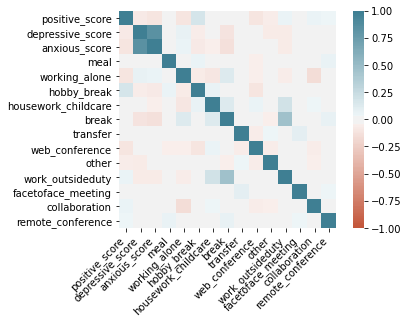

In [130]:
corr = ques_act_day_corr.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [131]:
att_weather = att_weather[['user_id', 'sex', 'age', 'locate_id',
       'locate_name', 'Date', 'ave_temperature', 'max_temperature',
       'mini_temperature', 'sum_rainfall', 'sunlight_time', 'ave_windspeed',
       'max_windspeed', 'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18',
       'weather_18to6', 'locate']]

In [132]:
att_weather['weather_6to18'].unique()

array(['曇', 'みぞれ時々曇一時晴後雨', '晴', '曇一時晴', '曇時々晴', '晴後一時曇', '雨一時曇', '雨後時々曇',
       '晴時々曇', '雨時々曇', '曇一時晴後雨、みぞれを伴う', '曇後時々晴', 'みぞれ時々雨後曇', '晴一時曇',
       '曇後雨時々晴', 'みぞれ時々晴一時雪後曇', '雨', '曇時々晴一時雨', '雨時々曇、みぞれを伴う',
       '曇一時雨後晴、みぞれを伴う', '雨時々曇後晴', '曇後時々晴一時雨', '雪時々曇後晴', '晴後曇一時雨', '曇後時々雨',
       '雪時々曇、みぞれを伴う', '曇後晴一時雪、みぞれを伴う', '晴一時雪、みぞれを伴う', '薄曇', '快晴',
       '曇後晴一時雨', '曇後一時晴', '晴後一時薄曇', '薄曇一時晴', '晴後雪', '雨後曇', '晴一時薄曇',
       '曇時々雨', '雨後一時曇', '曇後晴', '曇一時雪', '曇一時雪後一時晴', '雪時々みぞれ後曇一時晴',
       '曇一時雪後晴', '晴後曇一時雨、みぞれを伴う', '晴時々曇、みぞれを伴う', '曇時々晴後雨', '晴時々曇一時雪',
       '晴後時々曇', 'みぞれ時々雪後曇一時雨', '雪時々晴後曇、みぞれを伴う', '曇時々雨一時晴',
       '晴一時雪後曇、みぞれを伴う', '晴時々雨一時曇', '雪後みぞれ時々曇一時雨', '雨時々曇一時晴、雷を伴う',
       '曇一時雪後晴、みぞれを伴う', '曇一時雨後時々晴', '晴後曇一時雪', '雨時々みぞれ一時曇', '雪時々曇',
       '曇時々雪一時晴', '曇後時々雨、みぞれを伴う', '雨時々晴後曇', '曇時々晴後雪、みぞれを伴う', '雪', '雪後一時曇',
       '晴時々曇一時雨', '雨後晴', '曇一時雨', '雪後晴', '雪時々曇一時晴', '雪一時晴', '曇後雨一時みぞれ',
       '曇時々雪一時みぞれ', '晴後時々薄曇', '薄曇後一時雨', '薄曇時々晴', '曇一時雪、みぞれを伴う', '曇一時雨後晴',
       '曇時々雪一時晴、みぞれを伴う', '曇一時雪後雨、雷を伴う

In [133]:
att_weather.loc[att_weather['weather_6to18'].str.contains('晴',na=False),'weather_6to18']=2
att_weather.loc[att_weather['weather_6to18'].str.contains('雪',na=False),'weather_6to18']=0
att_weather.loc[att_weather['weather_6to18'].str.contains('雨',na=False),'weather_6to18']=0
att_weather.loc[att_weather['weather_6to18'].str.contains('曇',na=False),'weather_6to18']=1

att_weather.loc[att_weather['weather_18to6'].str.contains('晴',na=False),'weather_18to6']=2
att_weather.loc[att_weather['weather_18to6'].str.contains('雪',na=False),'weather_18to6']=0
att_weather.loc[att_weather['weather_18to6'].str.contains('雨',na=False),'weather_18to6']=0
att_weather.loc[att_weather['weather_18to6'].str.contains('曇',na=False),'weather_18to6']=1

In [134]:
dams_score = ques_act_day[['user_id','Date_jp','positive_score','depressive_score','anxious_score']]
att_weather['Date'] = pd.to_datetime(att_weather['Date'])
dams_score['Date_jp'] = pd.to_datetime(dams_score['Date_jp'])
dams_att_weather = pd.merge(dams_score,att_weather,left_on=['user_id','Date_jp'],right_on=['user_id','Date'],how='inner')

<ipython-input-134-754002e7b86a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dams_score['Date_jp'] = pd.to_datetime(dams_score['Date_jp'])


In [135]:
dams_att_weather.columns

Index(['user_id', 'Date_jp', 'positive_score', 'depressive_score',
       'anxious_score', 'sex', 'age', 'locate_id', 'locate_name', 'Date',
       'ave_temperature', 'max_temperature', 'mini_temperature',
       'sum_rainfall', 'sunlight_time', 'ave_windspeed', 'max_windspeed',
       'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18', 'weather_18to6',
       'locate'],
      dtype='object')

In [138]:
dams_att_weather_corr = dams_att_weather[['positive_score', 'depressive_score',
       'anxious_score', 'sex', 'age', 
       'ave_temperature', 'max_temperature', 'mini_temperature',
       'sum_rainfall', 'sunlight_time', 'ave_windspeed', 'max_windspeed',
       'ave_vaporpressure', 'weather_6to18', 'weather_18to6']]

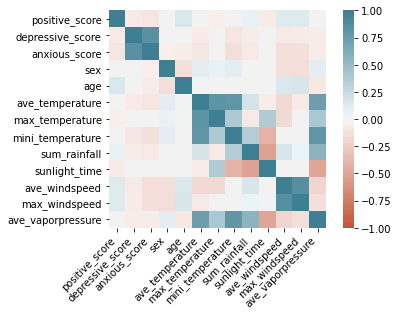

In [139]:
corr = dams_att_weather_corr.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [140]:
ques_act_day_corr

,positive_score,depressive_score,anxious_score,meeting_ftof,meal,working_alone,hobby_break,housework_childcare,break,transfer,web_conference,other,work_outsideduty,facetoface_meeting,collaboration,remote_conference
0,5.666667,0.666667,1.0,0,0.044983,0.000000,0.000000,0.00,0.0,30.000000,0.0,71.223333,0.000000,0.0,0.000000,0.0
1,3.666667,3.000000,2.0,0,6.866667,0.000000,45.633333,3.25,0.0,0.000000,0.0,0.000000,0.017717,0.0,0.000000,0.0
2,2.333333,0.000000,1.0,0,0.010333,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.333333,0.000000,4.0,0,7.967950,0.000000,0.000000,0.00,0.0,86.880667,0.0,47.286383,0.000000,0.0,0.000000,0.0
4,4.000000,3.000000,3.0,0,57.242667,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,6.666667,2.000000,3.0,0,0.000000,163.749867,0.000000,0.00,30.0,135.000000,0.0,0.000000,0.000000,0.0,40.026833,0.0
1135,6.666667,2.000000,3.0,0,22.000000,531.000000,0.000000,80.00,50.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,10.0
1136,3.000000,0.333333,2.0,0,25.000000,261.000000,187.987483,0.00,45.4,182.853700,211.2,0.000000,0.000000,0.0,0.000000,0.0
1137,5.000000,0.000000,0.0,0,30.000000,400.063700,0.000000,0.00,0.0,0.000000,60.0,0.000000,0.000000,0.0,0.000000,0.0


<AxesSubplot:>

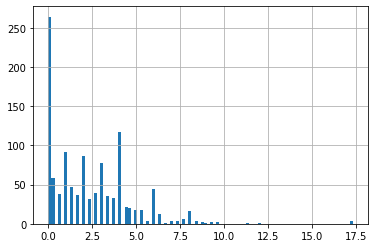

In [178]:
ques_act_day_corr['anxious_score'].hist(bins=100)

In [179]:
ques_act_day_corr['anxious_score'].quantile([0, 0.3, 0.5, 0.7, 1.0])

0.0     0.000000
0.3     0.666667
0.5     2.000000
0.7     3.333333
1.0    17.333333
Name: anxious_score, dtype: float64

In [174]:
ques_act_day_corr.loc[ques_act_day_corr['positive_score']<=2.666667,'positive_class']=0
ques_act_day_corr.loc[(ques_act_day_corr['positive_score']>2.666667)&(ques_act_day_corr['positive_score']<4.66667),'positive_class']=1
ques_act_day_corr.loc[ques_act_day_corr['positive_score']>=4.66667,'positive_class']=2

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [175]:
ques_act_day_corr

,positive_score,depressive_score,anxious_score,meeting_ftof,meal,working_alone,hobby_break,housework_childcare,break,transfer,web_conference,other,work_outsideduty,facetoface_meeting,collaboration,remote_conference,positive_class
0,5.666667,0.666667,1.0,0,0.044983,0.000000,0.000000,0.00,0.0,30.000000,0.0,71.223333,0.000000,0.0,0.000000,0.0,2.0
1,3.666667,3.000000,2.0,0,6.866667,0.000000,45.633333,3.25,0.0,0.000000,0.0,0.000000,0.017717,0.0,0.000000,0.0,1.0
2,2.333333,0.000000,1.0,0,0.010333,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.333333,0.000000,4.0,0,7.967950,0.000000,0.000000,0.00,0.0,86.880667,0.0,47.286383,0.000000,0.0,0.000000,0.0,0.0
4,4.000000,3.000000,3.0,0,57.242667,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,6.666667,2.000000,3.0,0,0.000000,163.749867,0.000000,0.00,30.0,135.000000,0.0,0.000000,0.000000,0.0,40.026833,0.0,2.0
1135,6.666667,2.000000,3.0,0,22.000000,531.000000,0.000000,80.00,50.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,10.0,2.0
1136,3.000000,0.333333,2.0,0,25.000000,261.000000,187.987483,0.00,45.4,182.853700,211.2,0.000000,0.000000,0.0,0.000000,0.0,1.0
1137,5.000000,0.000000,0.0,0,30.000000,400.063700,0.000000,0.00,0.0,0.000000,60.0,0.000000,0.000000,0.0,0.000000,0.0,2.0


In [162]:
merged_fitbit = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/merged_fitbit.csv')
sleep = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/.csv')

In [180]:
dams_score = ques_act_day[['user_id', 'value_dams', 'datetime_jp', 'Date_jp',
        'positive_score', 'depressive_score', 'anxious_score', 'Days_plus1']]
dams_score.loc[dams_score['positive_score']<=2.666667,'positive_class']=0
dams_score.loc[(dams_score['positive_score']>2.666667)&(dams_score['positive_score']<4.66667),'positive_class']=1
dams_score.loc[dams_score['positive_score']>=4.66667,'positive_class']=2

dams_score.loc[dams_score['depressive_score']<=0.333333,'depressive_class']=0
dams_score.loc[(dams_score['depressive_score']>0.333333)&(dams_score['depressive_score']<2.666667),'depressive_class']=1
dams_score.loc[dams_score['depressive_score']>=2.666667,'depressive_class']=2

dams_score.loc[dams_score['anxious_score']<=0.666667,'anxious_class']=0
dams_score.loc[(dams_score['anxious_score']>0.666667)&(dams_score['anxious_score']<3.333333),'anxious_class']=1
dams_score.loc[dams_score['anxious_score']>=3.333333,'anxious_class']=2

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [186]:
ques_fitbit = pd.merge(dams_score, merged_fitbit,left_on=['user_id','Date_jp'],right_on=['user_id','date_plus1'])
ques_fitbit = pd.merge(ques_fitbit, sleep,left_on=['user_id','Date_jp'],right_on=['user_id','date'])

In [183]:
merged_fitbit['Dayminus1'] = pd.to_datetime(merged_fitbit['date'])-dt.timedelta(days=1)

In [198]:
ques_fitbit.columns
ques_fitbit_corr = ques_fitbit[[ 'positive_score',
       'depressive_score', 'anxious_score', 
       'floor_mean', 'floor_median', 'floor_var', 'step_mean', 'step_median',
       'step_var', 'mets_mean', 'calory_mean', 'mets_median', 'calory_median',
       'mets_var', 'calory_var', 'heart_mean', 'heart_median', 'heart_var',
       'minutesFairlyActive_mean', 'minutesFairlyActive_median',
       'minutesFairlyActive_var', 'minutesLightlyActive_mean',
       'minutesLightlyActive_median', 'minutesLightlyActive_var',
       'minutesSedentary_mean', 'minutesSedentary_median',
       'minutesSedentary_var', 'minutesVeryActive_mean',
       'minutesVeryActive_median', 'minutesVeryActive_var','sleep_mean_y', 'sleep_median_y',
       'sleep_var_y']]

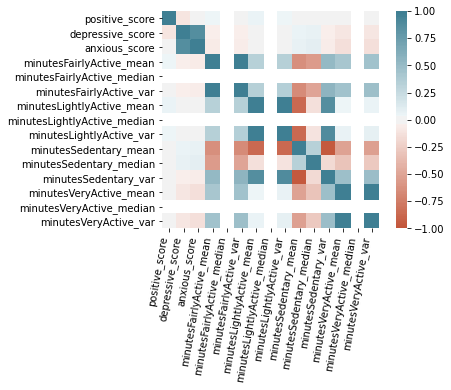

In [199]:
corr = ques_fitbit_corr.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=80,
    horizontalalignment='right'
);

In [203]:
import pandas as pd # 基本ライブラリ
import numpy as np # 基本ライブラリ
import matplotlib.pyplot as plt # グラフ描画用
import seaborn as sns; sns.set() # グラフ描画用
import warnings # 実行に関係ない警告を無視
import lightgbm as lgb #LightGBM
from sklearn import datasets
from sklearn.model_selection import train_test_split # データセット分割用
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)     
from sklearn.metrics import roc_auc_score # モデル評価用(auc)
from sklearn.metrics import confusion_matrix


In [205]:
# 説明変数,目的変数
y = ques_fitbit['positive_class'].values# 説明変数(target以外の特徴量)
X = ques_fitbit[[
       'floor_mean', 'floor_median', 'floor_var', 'step_mean', 'step_median',
       'step_var', 'mets_mean', 'calory_mean', 'mets_median', 'calory_median',
       'mets_var', 'calory_var', 'heart_mean', 'heart_median', 'heart_var',
       'minutesFairlyActive_mean', 'minutesFairlyActive_median',
       'minutesFairlyActive_var', 'minutesLightlyActive_mean',
       'minutesLightlyActive_median', 'minutesLightlyActive_var',
       'minutesSedentary_mean', 'minutesSedentary_median',
       'minutesSedentary_var', 'minutesVeryActive_mean',
       'minutesVeryActive_median', 'minutesVeryActive_var','sleep_mean_y', 'sleep_median_y',
       'sleep_var_y']].values # 目的変数(target)

# トレーニングデータ,テストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2)

In [206]:
# モデルの学習
model = lgb.LGBMClassifier() # モデルのインスタンスの作成
model.fit(X_train, y_train) # モデルの学習

# テストデータの予測クラス (予測クラス(0 or 1 or 2)を返す)
y_pred = model.predict(X_test)
# テストデータのクラス予測確率 (各クラスの予測確率 [クラス0の予測確率,クラス1の予測確率,クラス2の予測確率] を返す)
y_pred_prob = model.predict_proba(X_test)

In [207]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})
display(df_pred)

# 真値と予測確率の表示
df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1], 'target2_prob':y_pred_prob[:,2]})
display(df_pred_prob)

,target,target_pred
0,2.0,0.0
1,1.0,2.0
2,1.0,1.0
3,0.0,0.0
4,1.0,0.0
...,...,...
90,2.0,0.0
91,1.0,1.0
92,0.0,1.0
93,1.0,0.0


,y,target0_prob,target1_prob,target2_prob
0,2.0,0.970073,0.015768,0.014159
1,1.0,0.290574,0.068076,0.641349
2,1.0,0.399821,0.521576,0.078603
3,0.0,0.817231,0.163812,0.018957
4,1.0,0.500440,0.425712,0.073848
...,...,...,...,...
90,2.0,0.584617,0.247155,0.168228
91,1.0,0.053922,0.563105,0.382973
92,0.0,0.105931,0.888281,0.005788
93,1.0,0.986934,0.002944,0.010122


<AxesSubplot:>

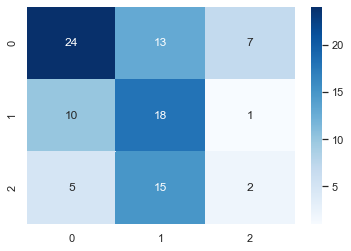

In [210]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

In [237]:
print(accuracy_score(y_test, y_pred))
# 特徴量重要度の算出 (データフレームで取得)
cols = list(ques_fitbit[[
       'floor_mean', 'floor_median', 'floor_var', 'step_mean', 'step_median',
       'step_var', 'mets_mean', 'calory_mean', 'mets_median', 'calory_median',
       'mets_var', 'calory_var', 'heart_mean', 'heart_median', 'heart_var',
       'minutesFairlyActive_mean', 'minutesFairlyActive_median',
       'minutesFairlyActive_var', 'minutesLightlyActive_mean',
       'minutesLightlyActive_median', 'minutesLightlyActive_var',
       'minutesSedentary_mean', 'minutesSedentary_median',
       'minutesSedentary_var', 'minutesVeryActive_mean',
       'minutesVeryActive_median', 'minutesVeryActive_var','sleep_mean_y', 'sleep_median_y',
       'sleep_var_y']].columns)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(model.feature_importance()) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [213]:
import pandas as pd # 基本ライブラリ
import numpy as np # 基本ライブラリ
import matplotlib.pyplot as plt # グラフ描画用
import seaborn as sns; sns.set() # グラフ描画用
import warnings # 実行に関係ない警告を無視
warnings.filterwarnings('ignore')
import lightgbm as lgb #LightGBM
from sklearn import datasets
from sklearn.model_selection import train_test_split # データセット分割用

In [221]:
import lightgbm as lgb

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's multi_logloss: 1.09942
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 1.08969
[3]	valid_0's multi_logloss: 1.08013
[4]	valid_0's multi_logloss: 1.06946
[5]	valid_0's multi_logloss: 1.06122
[6]	valid_0's multi_logloss: 1.05195
[7]	valid_0's multi_logloss: 1.04359
[8]	valid_0's multi_logloss: 1.0371
[9]	valid_0's multi_logloss: 1.03015
[10]	valid_0's multi_logloss: 1.02462
[11]	valid_0's multi_logloss: 1.01915
[12]	valid_0's multi_logloss: 1.01428
[13]	valid_0's multi_logloss: 1.00918
[14]	valid_0's multi_logloss: 1.00515
[15]	valid_0's multi_logloss: 1.00042
[16]	valid_0's multi_logloss: 0.995948
[17]	valid_0's multi_logloss: 0.992385
[18]	valid_0's multi_logloss: 0.989046
[19]	valid_0's multi_logloss: 0.9

,importance
user_id,834
floor_mean,380
floor_var,150
step_mean,268
step_var,304
mets_mean,273
calory_mean,256
mets_median,46
calory_median,413
mets_var,193


<AxesSubplot:>

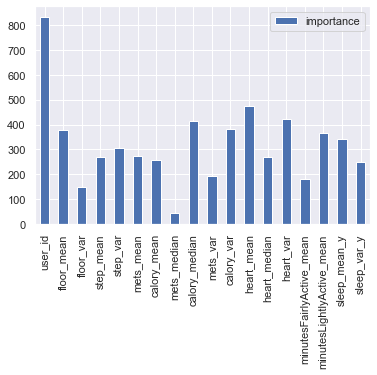

In [393]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = ques_fitbit[['user_id',
       'floor_mean',  'floor_var', 'step_mean', 
       'step_var', 'mets_mean', 'calory_mean', 'mets_median', 'calory_median',
       'mets_var', 'calory_var', 'heart_mean', 'heart_median', 'heart_var',
       'minutesFairlyActive_mean', 
        'minutesLightlyActive_mean','sleep_mean_y', 
       'sleep_var_y']], ques_fitbit['anxious_class']

# 学習データとテストデータを分ける
X_train, X_test, y_train, y_test = train_test_split(X, y)

# データを格納する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 学習条件を設定
params = {'task': 'train',
          'boosting_type': 'gbdt',
          'objective': 'multiclass',
          'metric': {'multi_logloss'},
          'num_class': 3,
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0}

# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=20)

# テストデータで予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)

# Accuracy を計算する
accuracy = sum(y_test == y_pred_max) / len(y_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), index=list(X.columns), columns=['importance'])
display(importance)
importance.plot.bar()



# print('f1-score:',f1_score(y_test,y_pred_max))

<AxesSubplot:>

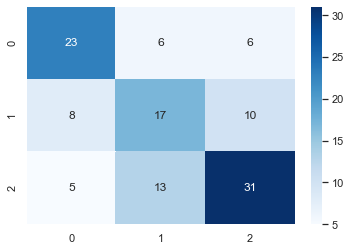

In [394]:
cm = confusion_matrix(y_test, y_pred_max)
sns.heatmap(cm, annot=True, cmap='Blues')

In [296]:

ques_act_day.loc[ques_act_day['positive_score']<=2.666667,'positive_class']=0
ques_act_day.loc[(ques_act_day['positive_score']>2.666667)&(ques_act_day['positive_score']<4.66667),'positive_class']=1
ques_act_day.loc[ques_act_day['positive_score']>=4.66667,'positive_class']=2

ques_act_day.loc[ques_act_day['depressive_score']<=0.333333,'depressive_class']=0
ques_act_day.loc[(ques_act_day['depressive_score']>0.333333)&(ques_act_day['depressive_score']<2.666667),'depressive_class']=1
ques_act_day.loc[ques_act_day['depressive_score']>=2.666667,'depressive_class']=2

ques_act_day.loc[ques_act_day['anxious_score']<=0.666667,'anxious_class']=0
ques_act_day.loc[(ques_act_day['anxious_score']>0.666667)&(ques_act_day['anxious_score']<3.333333),'anxious_class']=1
ques_act_day.loc[ques_act_day['anxious_score']>=3.333333,'anxious_class']=2

In [389]:
ques_act_day_pred =ques_act_day[[  'user_id','meeting_ftof',  'meal', 'working_alone',
       'hobby_break', 'housework_childcare', 'break', 'transfer',
       'web_conference', 'other', 'work_outsideduty', 'facetoface_meeting',
       'collaboration', 'remote_conference',  'positive_class',
       'depressive_class', 'anxious_class']]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's multi_logloss: 1.0917
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 1.08307
[3]	valid_0's multi_logloss: 1.07483
[4]	valid_0's multi_logloss: 1.06657
[5]	valid_0's multi_logloss: 1.059
[6]	valid_0's multi_logloss: 1.05069
[7]	valid_0's multi_logloss: 1.04376
[8]	valid_0's multi_logloss: 1.03708
[9]	valid_0's multi_logloss: 1.03069
[10]	valid_0's multi_logloss: 1.02425
[11]	valid_0's multi_logloss: 1.01807
[12]	valid_0's multi_logloss: 1.01246
[13]	valid_0's multi_logloss: 1.0066
[14]	valid_0's multi_logloss: 1.00163
[15]	valid_0's multi_logloss: 0.996078
[16]	valid_0's multi_logloss: 0.99123
[17]	valid_0's multi_logloss: 0.986441
[18]	valid_0's multi_logloss: 0.982116
[19]	valid_0's multi_logloss: 0.9783

,importance
user_id,3497
meal,1773
working_alone,1387
hobby_break,1259
housework_childcare,933
break,834
transfer,823
web_conference,629
other,729
work_outsideduty,198


<AxesSubplot:>

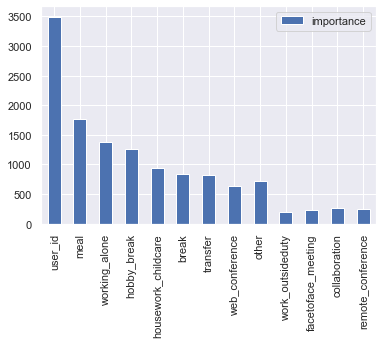

In [390]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
ques_act_day_pred['user_id'] = ques_act_day_pred['user_id'].astype('int')
X, y = ques_act_day_pred[['user_id',
        'meal', 'working_alone',
       'hobby_break', 'housework_childcare', 'break', 'transfer',
       'web_conference', 'other', 'work_outsideduty', 'facetoface_meeting',
       'collaboration', 'remote_conference']], ques_act_day_pred['anxious_class']

# 学習データとテストデータを分ける
X_train, X_test, y_train, y_test = train_test_split(X, y)

# データを格納する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 学習条件を設定
params = {'task': 'train',
          'boosting_type': 'gbdt',
          'objective': 'multiclass',
          'metric': {'multi_logloss'},
          'num_class': 3,
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0}

# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=20)

# テストデータで予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)

# Accuracy を計算する
accuracy = sum(y_test == y_pred_max) / len(y_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), index=list(X.columns), columns=['importance'])
display(importance)
importance.plot.bar()


<AxesSubplot:>

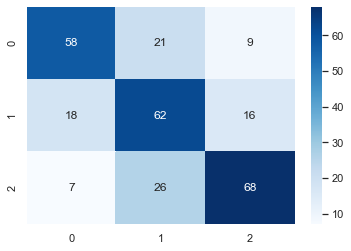

In [391]:
cm = confusion_matrix(y_test, y_pred_max)
sns.heatmap(cm, annot=True, cmap='Blues')

In [335]:
dams_score['Date_jp'] = pd.to_datetime(dams_score['Date_jp'])
att_weather_dams = pd.merge(dams_score, att_weather,left_on=['user_id','Date_jp'],right_on=['user_id','Date'])

In [339]:
att_weather_dams_pred = att_weather_dams[['positive_class',
       'depressive_class', 'anxious_class', 'sex', 'age', 'locate_id',
        'ave_temperature', 'max_temperature',
       'mini_temperature', 'sum_rainfall', 'sunlight_time', 'ave_windspeed',
       'max_windspeed', 'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18',
       'weather_18to6']]

In [340]:
att_weather_dams.columns

Index(['user_id', 'value_dams', 'datetime_jp', 'Date_jp', 'positive_score',
       'depressive_score', 'anxious_score', 'Days_plus1', 'positive_class',
       'depressive_class', 'anxious_class', 'sex', 'age', 'locate_id',
       'locate_name', 'Date', 'ave_temperature', 'max_temperature',
       'mini_temperature', 'sum_rainfall', 'sunlight_time', 'ave_windspeed',
       'max_windspeed', 'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18',
       'weather_18to6', 'locate'],
      dtype='object')

In [392]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = att_weather_dams_pred[[ 'sex', 'age', 
        'ave_temperature', 'max_temperature',
       'mini_temperature', 'sum_rainfall', 'sunlight_time', 'ave_windspeed',
       'max_windspeed', 'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18',
       'weather_18to6']], att_weather_dams_pred['anxious_class']
att_weather_dams_pred[['sex', 'age', 'weather_6to18',
       'weather_18to6']]=att_weather_dams_pred[['sex', 'age', 'weather_6to18',
       'weather_18to6']].astype('int')
# 学習データとテストデータを分ける
X_train, X_test, y_train, y_test = train_test_split(X, y)

# データを格納する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 学習条件を設定
params = {'task': 'train',
          'boosting_type': 'gbdt',
          'objective': 'multiclass',
          'metric': {'multi_logloss'},
          'num_class': 3,
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0}

# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=20,
#                   categorical_feature = att_weather_dams_pred[[ 'sex', 'age', 'weather_6to18','weather_18to6']]
                 )

# テストデータで予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)

# Accuracy を計算する
accuracy = sum(y_test == y_pred_max) / len(y_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), index=list(X.columns), columns=['importance'])
display(importance)
importance.plot.bar()

KeyError: "['user_id'] not in index"

<AxesSubplot:>

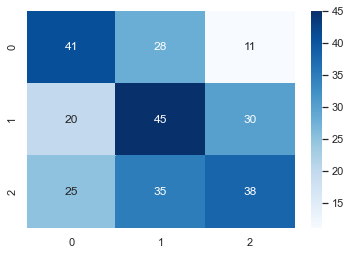

In [384]:
cm = confusion_matrix(y_test, y_pred_max)
sns.heatmap(cm, annot=True, cmap='Blues')